> In this notebook, we evaluate the models' performance based on the results we obtained through the following Git Repository :  [combining-evolutionary-and-assay-labelled-data](https://github.com/chloechsu/combining-evolutionary-and-assay-labelled-data).

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
from helpers import*from matplotlib.backends.backend_pdf import PdfPages

### 1. Models comparison for Light Dataset

In [ ]:
# Loading 

df_Light = pd.read_csv('results/Light/results.csv')

mapping = {
    'onehot': 'Ridge Regression',
    'ev': 'UnsupervisedEV',
    'ev+onehot': 'AugmentedEV'
}
df_Light['predictor'] = df_Light['predictor'].replace(mapping)

C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\435043455.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True,
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\435043455.py:16: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True,


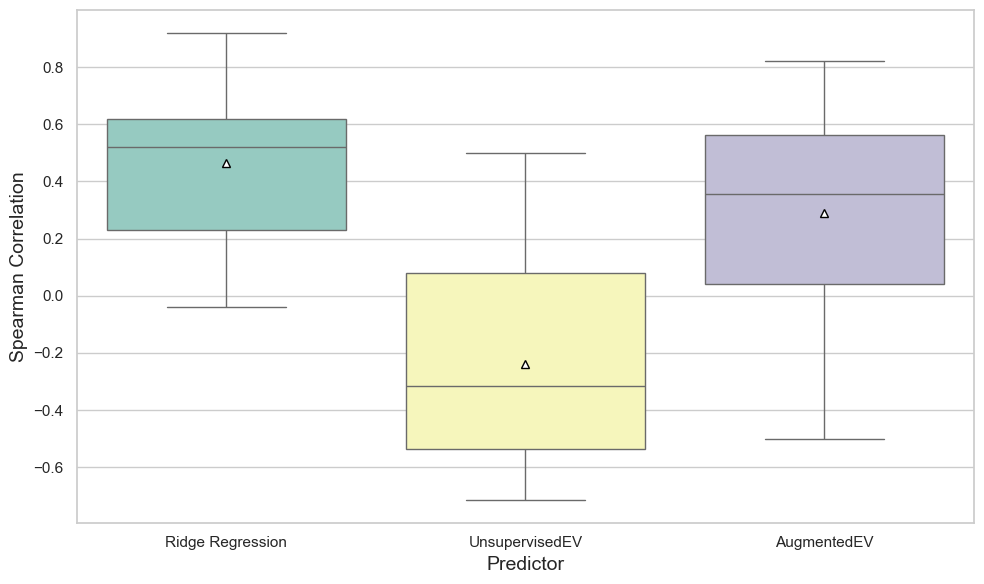

In [8]:
# Sort the DataFrame by 'predictors' column using the defined order
order = ['Ridge Regression', 'UnsupervisedEV', 'AugmentedEV']
df_Light['predictor'] = pd.Categorical(df_Light['predictor'], categories=order, ordered=True)
df_Light = df_Light.sort_values('predictor')

# Box plot
sns.set(style="whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.tight_layout()
plt.savefig('plots/Light_model_comparison.pdf', dpi = 300)
plt.show()

### 2. Test size comparison

C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1478170663.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='training_size', y='spearman', data=results_df, palette=custom_palette)
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1478170663.py:25: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='training_size', y='spearman', data=results_df, palette=custom_palette)


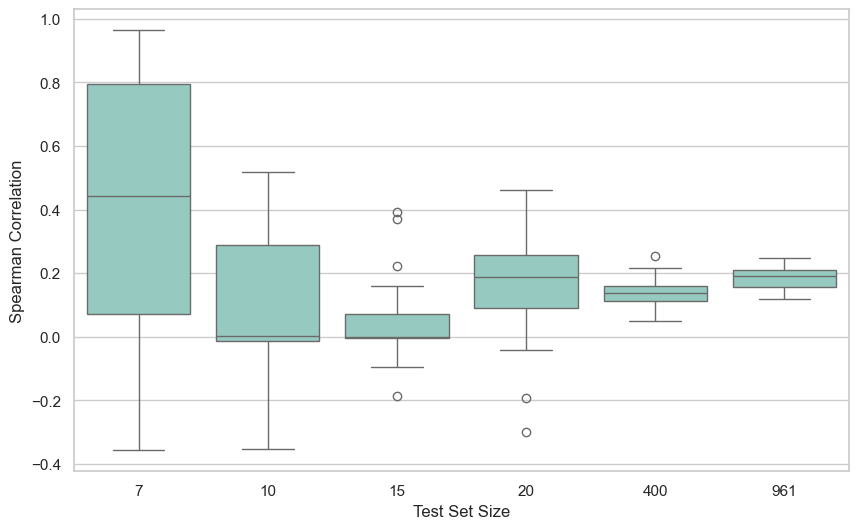

In [11]:
base_path = 'results'
plot_spearman_boxplot(base_path)